In [1]:
!pip uninstall opencv-python-headless --yes

Found existing installation: opencv-python-headless 4.5.4.60
Uninstalling opencv-python-headless-4.5.4.60:
  Successfully uninstalled opencv-python-headless-4.5.4.60


In [2]:
!pip install opencv-python==4.5.4.60

     |████████████████████████████████| 60.3 MB 372 kB/s  eta 0:00:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
import tensorflow as tf

print(tf.__version__)

2.17.0


In [1]:
from PIL import Image, ImageDraw, ImageFont
import os

In [2]:
data_dir = 'text'
wordlist_file = os.path.join(data_dir, 'sah.wordlist')
training_text_file = os.path.join(data_dir, 'sah.training_text')
fonts_list_file = os.path.join(data_dir, 'okfonts_test.txt')

fonts_dir = os.path.join(data_dir, 'fonts')

output_dir = 'test_images'

In [3]:
with open(wordlist_file, 'r', encoding='utf-8') as f:
    words = f.readlines()

with open(training_text_file, 'r', encoding='utf-8') as f:
    training_text = f.readlines()

with open(fonts_list_file, 'r', encoding='utf-8') as f:
    styles = [line.strip() for line in f.readlines()]

In [4]:
def load_fonts_from_styles(styles_list, base_fonts_dir):
    fonts = []
    for style in styles_list:
        style_dir = os.path.join(base_fonts_dir, style)
        if os.path.exists(style_dir):
            for file in os.listdir(style_dir):
                if file.endswith(('.ttf', '.otf')):
                    fonts.append(os.path.join(style_dir, file))
        else:
            print(f"Директория для стиля '{style}' не найдена: {style_dir}")
    return fonts

In [5]:
fonts = load_fonts_from_styles(styles, fonts_dir)

In [6]:
def generate_image(text, font_path, image_size=(500, 100), font_size=30):
    image = Image.new('RGB', image_size, color=(255, 255, 255))
    draw = ImageDraw.Draw(image)
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        print(f"Не удалось загрузить шрифт: {font_path}")
        return None
        
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    text_x = (image_size[0] - text_width) // 2
    text_y = (image_size[1] - text_height) // 2

    draw.text((text_x, text_y), text, font=font, fill=(0, 0, 0))
    
    return image

In [7]:
for i, text in enumerate(training_text):
    if i < len(fonts):
        font = fonts[i]
        image = generate_image(text.strip(), font)
        if image:
            output_path = os.path.join(output_dir, f'image_{i}_{os.path.basename(font)}.png')
            image.save(output_path)
            print(f'Изображение сохранено: {output_path}')
    else:
        print("Недостаточно шрифтов для всех текстов.")
        break

Изображение сохранено: test_images/image_0_AlegreyaSans-ThinItalic.ttf.png
Изображение сохранено: test_images/image_1_AlegreyaSans-ExtraBold.ttf.png
Изображение сохранено: test_images/image_2_AlegreyaSans-MediumItalic.ttf.png
Изображение сохранено: test_images/image_3_AlegreyaSans-Regular.ttf.png
Изображение сохранено: test_images/image_4_AlegreyaSans-Light.ttf.png
Изображение сохранено: test_images/image_5_AlegreyaSans-BlackItalic.ttf.png
Изображение сохранено: test_images/image_6_AlegreyaSans-LightItalic.ttf.png
Изображение сохранено: test_images/image_7_AlegreyaSans-Black.ttf.png
Изображение сохранено: test_images/image_8_AlegreyaSans-BoldItalic.ttf.png
Изображение сохранено: test_images/image_9_AlegreyaSans-Medium.ttf.png
Изображение сохранено: test_images/image_10_AlegreyaSans-Bold.ttf.png
Изображение сохранено: test_images/image_11_AlegreyaSans-Thin.ttf.png
Изображение сохранено: test_images/image_12_AlegreyaSans-Italic.ttf.png
Изображение сохранено: test_images/image_13_Alegreya

In [15]:
import keras_ocr
import matplotlib.pyplot as plt

In [16]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


2024-09-25 23:18:34.051067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 23:18:36.806020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13123 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6
2024-09-25 23:18:36.806901: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 5288 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:24:00.0, compute capability: 8.6
2024-09-25 23:18:36.807643: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:2 wi

Looking for /root/.keras-ocr/crnn_kurapan.h5


In [9]:
image_filenames = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.png')]

In [10]:
images = [keras_ocr.tools.read(image_filename) for image_filename in image_filenames]

In [11]:
predictions = pipeline.recognize(images)

5/5 [==============================] - 0s 69ms/step


In [12]:
for image, prediction in zip(images, predictions):
    print("Predicted text:")
    for word, box in prediction:
        print(word)

Predicted text:
t
xopymayyp
xaw
cypyh
biwbitbiblra
awih
Predicted text:
cypyuaapbl
kanaapu
oyhyh
tblmhblbl
myo
Predicted text:
cblh
enlehep
copoxtopro
cyplyk
koncuups
Predicted text:
cblaaapbleap
xaaaaah
amucka
yaaxahhbk
s
Predicted text:
6
abamap
kuhu
kahhummih
uhhuha
h
kamueap
Predicted text:
myoha
ohyhyh
gueh
aamn
yh
yy
Predicted text:
hblh
obohyh
obapblk
buup
caxa
cypyh
Predicted text:
obaublblbl
oe
cypyh
myoxmyp
caha
upima
Predicted text:
oho5y
ycmama
kemytyek
kypaahax
Predicted text:
jbaakka
zaat816
slaapbl
gjbimaapbl
Predicted text:
16at
bblhah
byonnar
apbl
xaibl
aaybinap
bl
Predicted text:
pdepep
cblhblam
caxa
m
mbiabieap
mahhblk
Predicted text:
ymtah
uhhvrep
onnoohhooh
oniopoh
Predicted text:
apkemmrapagtp
gyonapxoo
kehhmep
Predicted text:
cabbidblaablhah
dush
yeckeabum
ca
rku
mbliablh
Predicted text:
bavifajitah
xotyty
myyctaax
t
kojior
Predicted text:
cblhblam
myoxmyyp
myc
myoxmyyp
pe
k
Predicted text:
tyopaahbi
hhbi
tbimhbibihbl
atahha
Predicted text:
d
xaablibiba
cblhblam


In [3]:
import matplotlib.pyplot as plt

import keras_ocr

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg'
    ]
]

2024-09-27 03:50:02.022996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 03:50:02.160682: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Looking for /root/.keras-ocr/craft_mlt_25k.h5


2024-09-27 03:50:15.334899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 03:50:17.863743: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19510 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6
2024-09-27 03:50:17.864574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 16858 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:24:00.0, compute capability: 8.6
2024-09-27 03:50:17.865234: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:2 w

Looking for /root/.keras-ocr/crnn_kurapan.h5


2024-09-27 03:50:34.873673: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2024-09-27 03:50:37.602669: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2/2 [==============================] - 3s 259ms/step


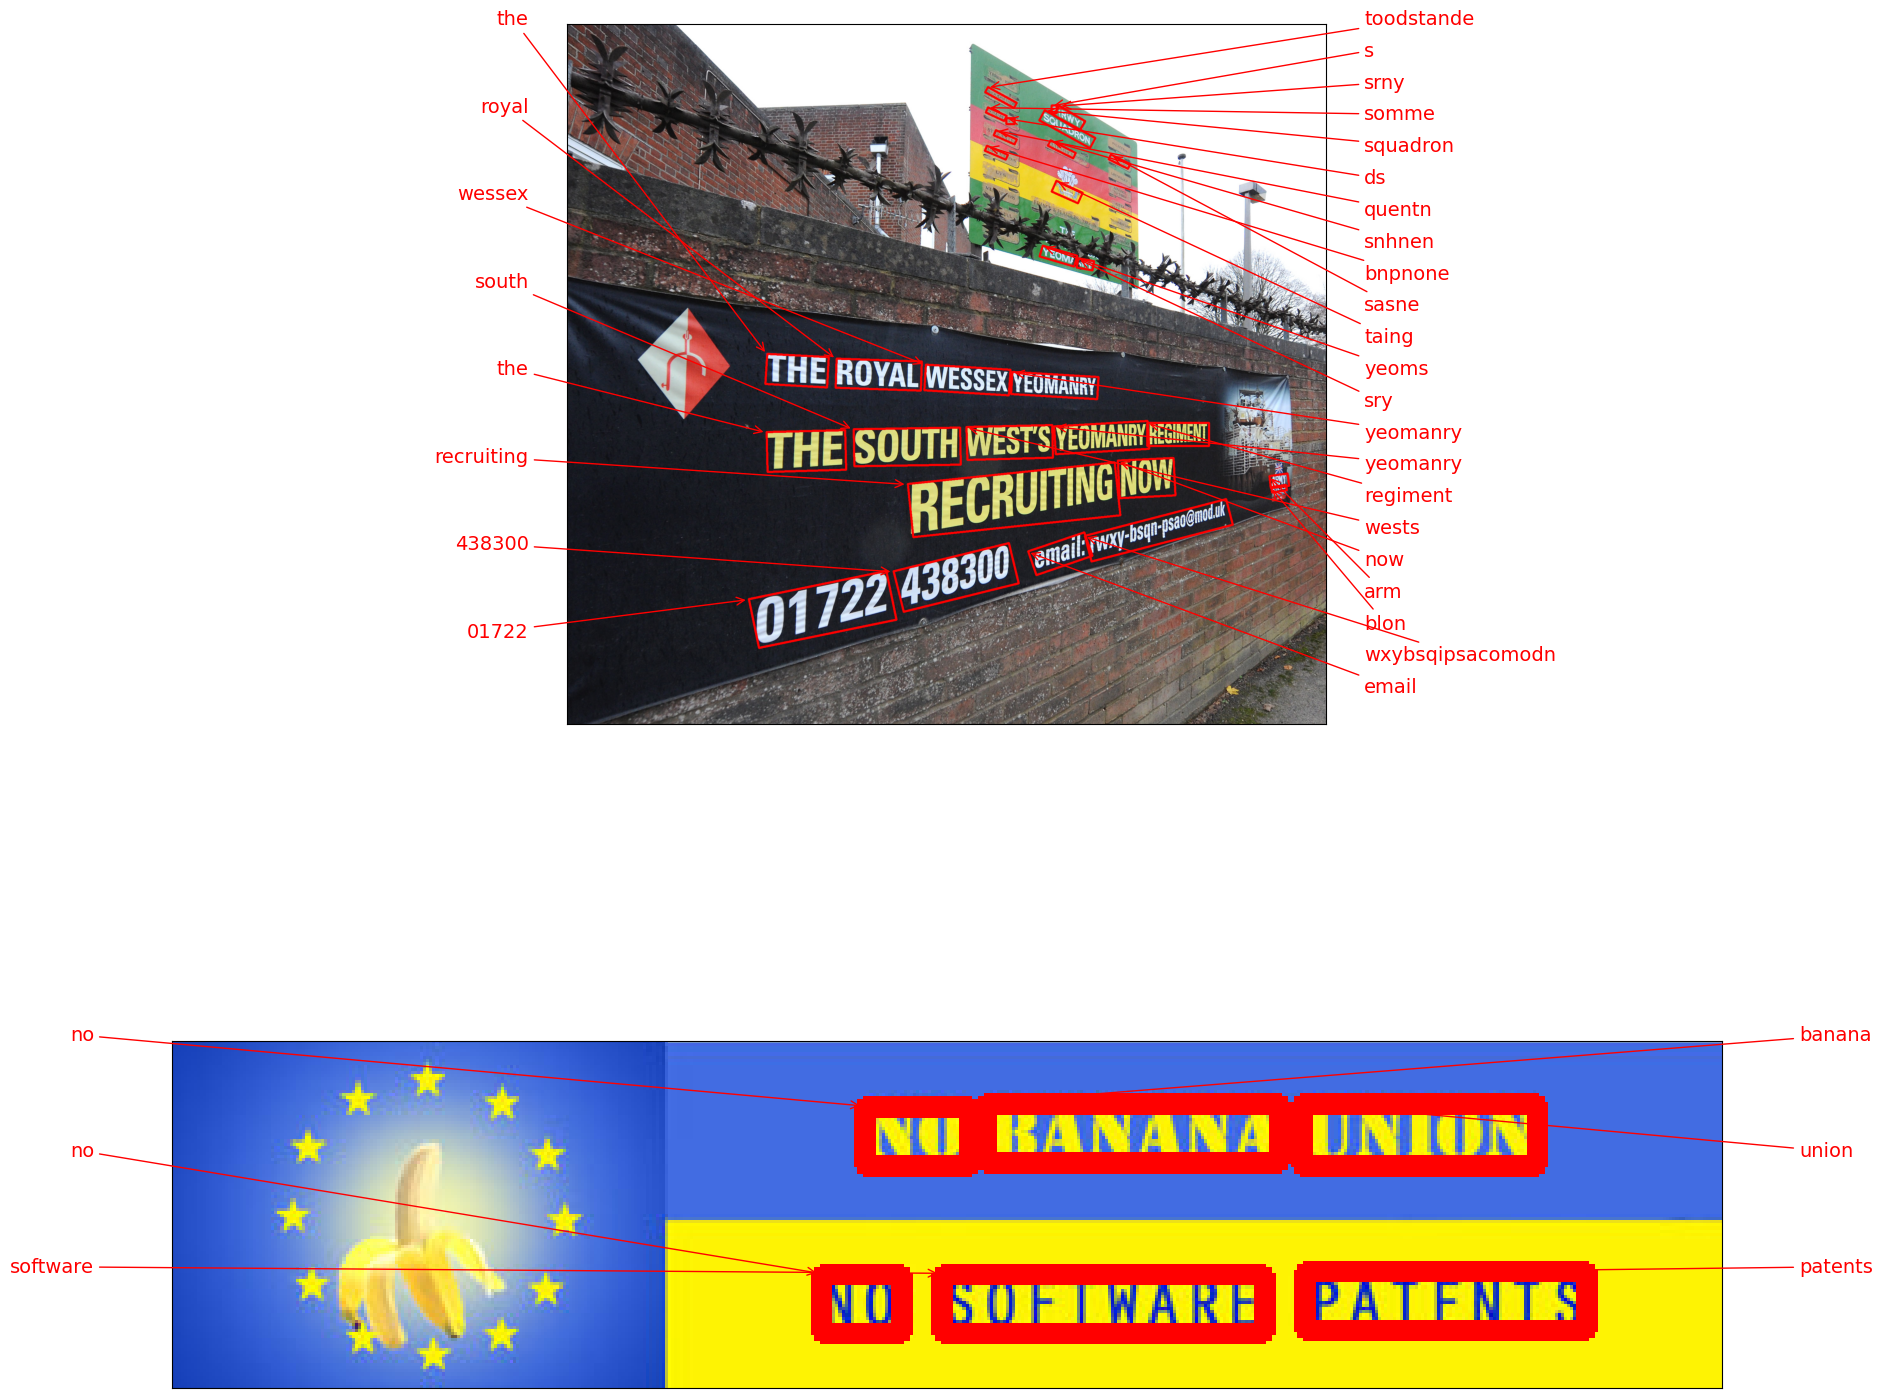

In [4]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)